## Importing MNIST Dataset

In [118]:
# Fetch MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
def show_digit(pixels):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    digit_img = pixels.reshape(28, 28)
    plt.imshow(digit_img, cmap= mpl.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

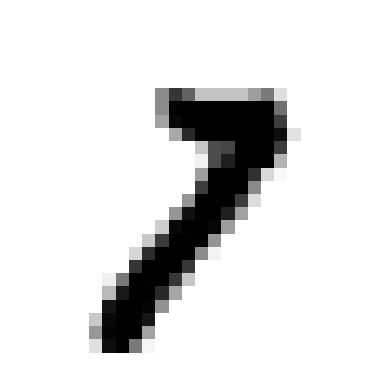

In [5]:
from random import randrange

random_digit = randrange(len(X))
show_digit(X.iloc[random_digit].values)

In [6]:
# Split into test and train
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # The data is already shuffled for us

In [8]:
X_train.shape

(60000, 784)

In [12]:
c.value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: class, dtype: float64

## Data Preprocessing

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Training

<b>Warning!</b>
Some training sets might take several minutes to run 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_scores = cross_val_score(dtc, X_train_scaled, y_train, cv=3, scoring='accuracy')
print('For Decision Tree:', dtc_scores)

For Decision Tree [0.8586  0.8599  0.86265]


In [80]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc_scores = cross_val_score(sgdc, X_train_scaled, y_train, cv=3, scoring='accuracy')
print('For Stochastic Gradient Descent:', sgdc_scores)

For Stochastic Gradient Descent: [0.89675 0.88815 0.90045]


In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc_scores = cross_val_score(lrc, X_train, y_train, cv=3, scoring='accuracy')
print('For Logistic Regression:', lrc_scores)

/home/ellzo/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ellzo/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

For Logistic Regression [0.91275 0.91565 0.9171 ]


/home/ellzo/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc_scores = cross_val_score(knc, X_train, y_train, cv=3, scoring='accuracy')
print('For K-Nearest Neighbors:', knc_scores)

For K-Nearest Neighbors: [0.9676  0.9671  0.96755]


In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=3, scoring='accuracy')
print('For Random Forest:', rfc_scores)

For Random Forest: [0.9651  0.96355 0.96455]


In [43]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train, cv=3, scoring='accuracy')
print('For Support Vectore Machine:', svc_scores)

For Support Vectore Machine: [0.977  0.9738 0.9739]


Let's plot the overall accuracy of each model and compare

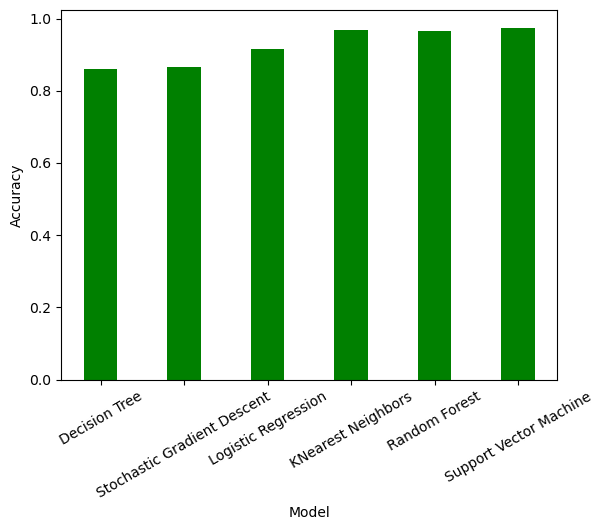

In [47]:
accuracy_dict = {
    'Decision Tree': np.mean(dtc_scores),
    'Stochastic Gradient Descent': np.mean(sgdc_scores),
    'Logistic Regression': np.mean(lrc_scores),
    'KNearest Neighbors': np.mean(knc_scores),
    'Random Forest': np.mean(rfc_scores),
    'Support Vector Machine': np.mean(svc_scores)
}

plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='g', width= 0.4)
plt.xticks(rotation=30)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

The most promising ones seem to be KNearest Neighbors, Random Forest, and Support Vector Machines! Let's do a grid search to pick the best model!

### Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Let's take a sample from the training set for GridSearch
X_train_grid = X_train.sample(frac=0.15, replace=False, random_state=13)
y_train_grid = y_train.loc[X_train_grid.index]

len(y_train_grid)

9000

In [57]:
param_grid_svc = [
    {'C': [0.05, 1, 20], 'gamma': [0.0001, 0.01, 1], 'kernel': ['linear', 'rbf']}
]

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring='accuracy', return_train_score=True, verbose=10)
#grid_search_svc.fit(X_train_grid, y_train_grid)

In [72]:
param_grid_knc = [
    {'n_neighbors': [3, 4, 5, 6, 8], 'weights': ['uniform', 'distance']}
]

grid_search_knc = GridSearchCV(knc, param_grid_knc, cv=3, scoring='accuracy', return_train_score=True)
grid_search_knc.fit(X_train_grid, y_train_grid)

GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(n_neighbors=6, weights='distance'),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 8],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [73]:
print('Best estimator for K-Nearest Neighbors is:', grid_search_knc.best_params_)

cvres_knc = grid_search_knc.cv_results_

for mean_score, params in zip(cvres_knc["mean_test_score"], cvres_knc["params"]):
    print(mean_score, params)

knc_final = grid_search_knc.best_estimator_

Best estimator for K-Nearest Neighbors is: {'n_neighbors': 4, 'weights': 'distance'}
0.9376666666666668 {'n_neighbors': 3, 'weights': 'uniform'}
0.9409999999999998 {'n_neighbors': 3, 'weights': 'distance'}
0.9365555555555556 {'n_neighbors': 4, 'weights': 'uniform'}
0.9438888888888889 {'n_neighbors': 4, 'weights': 'distance'}
0.9377777777777778 {'n_neighbors': 5, 'weights': 'uniform'}
0.9415555555555556 {'n_neighbors': 5, 'weights': 'distance'}
0.9365555555555556 {'n_neighbors': 6, 'weights': 'uniform'}
0.9420000000000001 {'n_neighbors': 6, 'weights': 'distance'}
0.934888888888889 {'n_neighbors': 8, 'weights': 'uniform'}
0.9391111111111111 {'n_neighbors': 8, 'weights': 'distance'}


In [76]:
param_grid_rfc = [
    {'n_estimators': [960, 1500], 'max_features': [48, 64]}
]

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=3, scoring='accuracy', return_train_score=True, verbose=10)
grid_search_rfc.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START max_features=48, n_estimators=960...........................
[CV 1/3; 1/4] END max_features=48, n_estimators=960;, score=(train=1.000, test=0.945) total time=  23.5s
[CV 2/3; 1/4] START max_features=48, n_estimators=960...........................
[CV 2/3; 1/4] END max_features=48, n_estimators=960;, score=(train=1.000, test=0.937) total time=  24.8s
[CV 3/3; 1/4] START max_features=48, n_estimators=960...........................
[CV 3/3; 1/4] END max_features=48, n_estimators=960;, score=(train=1.000, test=0.944) total time=  23.9s
[CV 1/3; 2/4] START max_features=48, n_estimators=1500..........................
[CV 1/3; 2/4] END max_features=48, n_estimators=1500;, score=(train=1.000, test=0.947) total time=  39.3s
[CV 2/3; 2/4] START max_features=48, n_estimators=1500..........................
[CV 2/3; 2/4] END max_features=48, n_estimators=1500;, score=(train=1.000, test=0.939) total time=  36.9s
[CV 3/3;

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [48, 64],
                          'n_estimators': [960, 1500]}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [77]:
print('Best estimator for Random Forest is:', grid_search_rfc.best_params_)

cvres_rfc = grid_search_rfc.cv_results_

for mean_score, params in zip(cvres_rfc["mean_test_score"], cvres_rfc["params"]):
    print(mean_score, params)

rfc_final = grid_search_rfc.best_estimator_

Best estimator for Random Forest is: {'max_features': 48, 'n_estimators': 1500}
0.9421111111111111 {'max_features': 48, 'n_estimators': 960}
0.9426666666666667 {'max_features': 48, 'n_estimators': 1500}
0.9421111111111111 {'max_features': 64, 'n_estimators': 960}
0.9417777777777777 {'max_features': 64, 'n_estimators': 1500}


Let's now train the most promising model on the whole training set with cross validation

In [80]:
knc_y_predict = cross_val_predict(knc_final, X_train, y_train, cv=3)
print('Accuracy of best KNeighbors Classifier:', accuracy_score(knc_y_predict, y_train))

Accuracy of best KNeighbors Classifier: 0.97035


Perfect! Seems like <b>KNeighbors Classifier</b> is the model to go with!

Let's analyze the errors that this model made

## Error Analysis

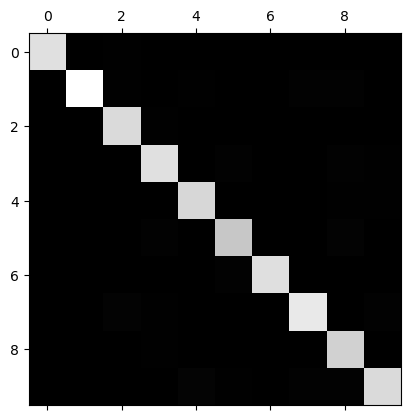

In [81]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(knc_y_predict, y_train)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

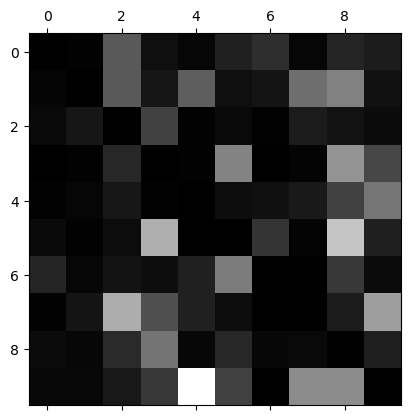

In [82]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Next, we will augment the data and retrain our model. Hopefully, we can get an even better accuracy!

## Data Augmentation

In [97]:
from scipy.ndimage import shift
import random
import numpy as np

aug_X_train = X_train.values.tolist()
aug_y_train = y_train.values.tolist()
l = len(X_train)

to_iter = zip(aug_X_train.copy(), aug_y_train.copy())

for img, label in to_iter:
    for sh in ((0, 1), (1, 0), (-1, 0), (0, -1)):
        updated_row = shift(np.array(img).reshape(28, 28), sh, cval=0, mode='constant')
        updated_row_flat = updated_row.flatten()
        aug_X_train.append(updated_row_flat)
        aug_y_train.append(label)

len(aug_X_train)

300000

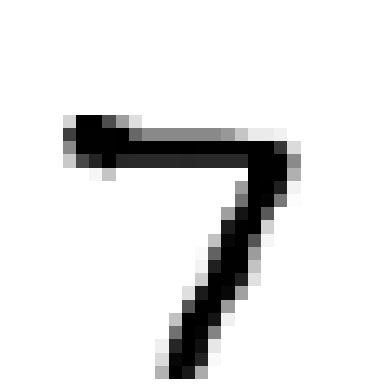

In [103]:
random_digit = randrange(l, len(aug_X_train))
show_digit(aug_X_train[random_digit])

In [107]:
aug_X_train = np.array(aug_X_train)
aug_y_train = np.array(aug_y_train)

shuffle_idx = np.random.permutation(len(aug_X_train))
aug_X_train = aug_X_train[shuffle_idx]
aug_y_train = aug_y_train[shuffle_idx]

In [112]:
final_classifier = KNeighborsClassifier(**grid_search_knc.best_params_)
final_classifier.fit(aug_X_train, aug_y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Let's test now on the test set

In [115]:
X_test = X_test.values
final_predictions = final_classifier.predict(X_test)
accuracy_score(final_predictions, y_test)

0.9763

Whoo! We managed to build a MNIST classifier with over <b>97%</b> accuracy!

## Model Export

In [117]:
import joblib

joblib.dump(final_classifier, "mnist_classifier.pkl")

['mnist_classifier.pkl']